# When are tickets most likely to be issued? Any seasonality?

### 2013-14

In [81]:
import pandas as pd
import dask as dd
import seaborn as sns
from datetime import datetime
from collections import defaultdict
from matplotlib import pyplot

In [108]:
# dateparse = lambda x: datetime.strptime(x, '%m/%d/%Y')

In [113]:
data_13_14 = pd.read_csv("./Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv",
                        usecols=['Date First Observed'])
#                         parse_dates=['Date First Observed'],
#                         date_parser=dateparse)

In [115]:
set(str(date)[0:4] for date in data_13_14['Date First Observed'])

{'0.0',
 '2003',
 '2004',
 '2006',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2023',
 '2024',
 '2027',
 '2031',
 'nan'}

In [116]:
data_13_14.head()

NameError: name 'data_15' is not defined

In [29]:
data_13_14.shape

(9100278, 1)

In [45]:
months = defaultdict(int)

In [46]:
for date in data_13_14['Issue Date']:
    months[date.month] += 1

In [47]:
months

defaultdict(int,
            {8: 838950,
             7: 173157,
             3: 907505,
             6: 681133,
             5: 898409,
             9: 827402,
             4: 860217,
             10: 953458,
             1: 722439,
             2: 654201,
             12: 734760,
             11: 848647})

In [66]:
months_ordered = {'Jan':0,'Feb':0,'Mar':0,'Apr':0,'May':0,'Jun':0,'July':0,'Aug':0,
                  'Sept':0,'Oct':0,'Nov':0,'Dec':0}
for i,key in enumerate(months_ordered.keys()):
    months_ordered[key] = months[i]
print(months_ordered)

{'Jan': 0, 'Feb': 722439, 'Mar': 654201, 'Apr': 907505, 'May': 860217, 'Jun': 898409, 'July': 681133, 'Aug': 173157, 'Sept': 838950, 'Oct': 827402, 'Nov': 953458, 'Dec': 848647}


In [74]:
months_pd = pd.DataFrame(months_ordered.items(),columns=['Month','Issue Date'])
months_pd

,Month,Issue Date
0,Jan,0
1,Feb,722439
2,Mar,654201
3,Apr,907505
4,May,860217
5,Jun,898409
6,July,681133
7,Aug,173157
8,Sept,838950
9,Oct,827402


In [58]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


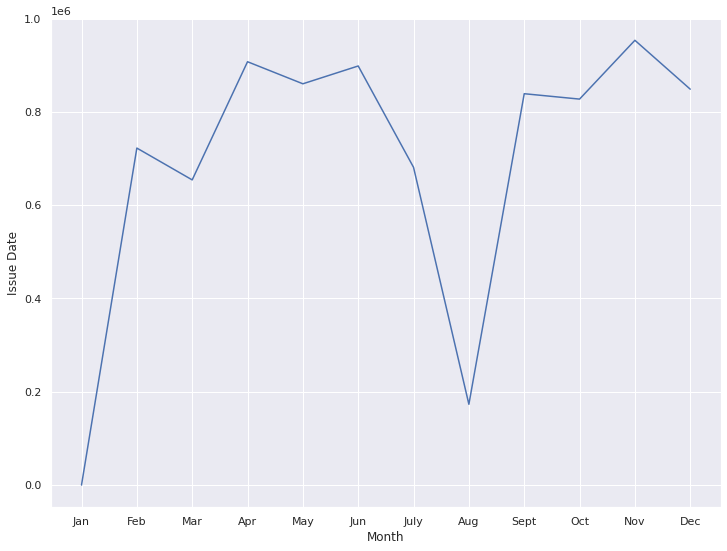

In [84]:
_, ax = pyplot.subplots(figsize=(12,9))

sns.set(style="darkgrid")

# Plot the isse dates for different months
sns.lineplot(x="Month",
             y="Issue Date",
             ax=ax,
             data=months_pd,
             sort=False)

In [ ]:
def IssueDate_LinePlot(data,col_name):
    dateparse = lambda x: datetime.strptime(x, '%m/%d/%Y')
    data_13_14 = pd.read_csv("./Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv",
                        usecols=[ 'Issue Date'],
                        parse_dates=['Issue Date'],
                        date_parser=dateparse)
    